In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from scipy.signal import firwin, lfilter, iirnotch
from tqdm import tqdm


In [4]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt('/ECG_reposo.txt')
array2= np.genfromtxt('/ECG_hiperventilación.txt')
array3= np.genfromtxt('/ECG_despuesdeactividad.txt')

array1 = array1[:,6]
print("Señal 1 en reposo:",array1)
array2 = array2[:,6]
print("Señal 2 hiperventilacion:",array2)
array3= array3[:,6]
print("Señal 3 despues de actividad:",array3)

Señal 1 en reposo: [489. 479. 473. ... 615. 606. 591.]
Señal 2 hiperventilacion: [504. 498. 497. ... 505. 495. 485.]
Señal 3 despues de actividad: [480. 479. 482. ... 602. 608. 615.]


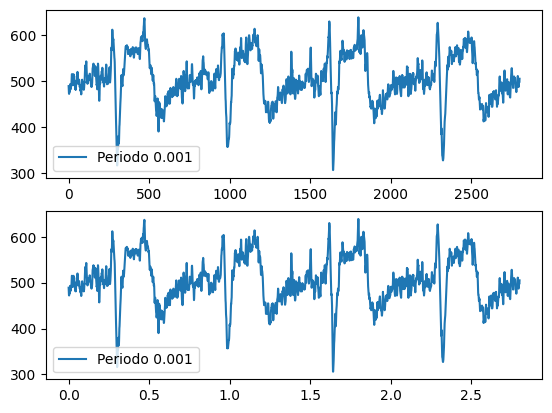

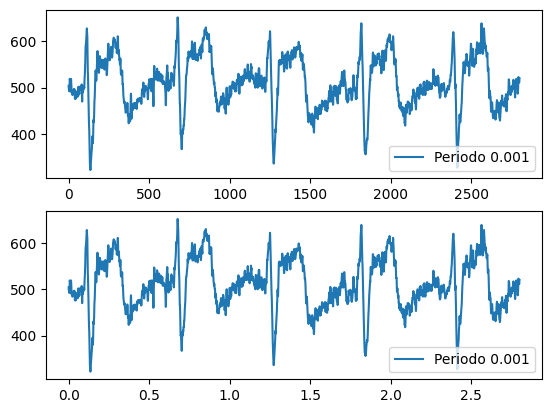

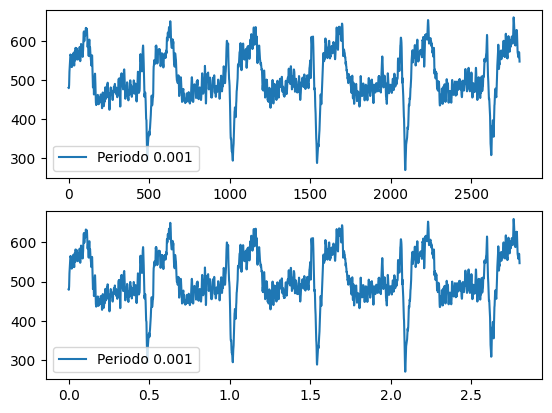

In [6]:
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
array1=array1[0:2800]
array2=array2[0:2800]
array3=array3[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(array1)
n = np.arange(0,M)

t = n/Fs

#Señal en reposo , eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array1,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array1,label=f"Periodo {T1}")
axes[1].legend()

#Señal hiperventilacion , eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array2,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array2,label=f"Periodo {T1}")
axes[1].legend()

#Señal despues de hacer ejercicio, eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array3,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array3,label=f"Periodo {T1}")
axes[1].legend()




Transformada wavelet

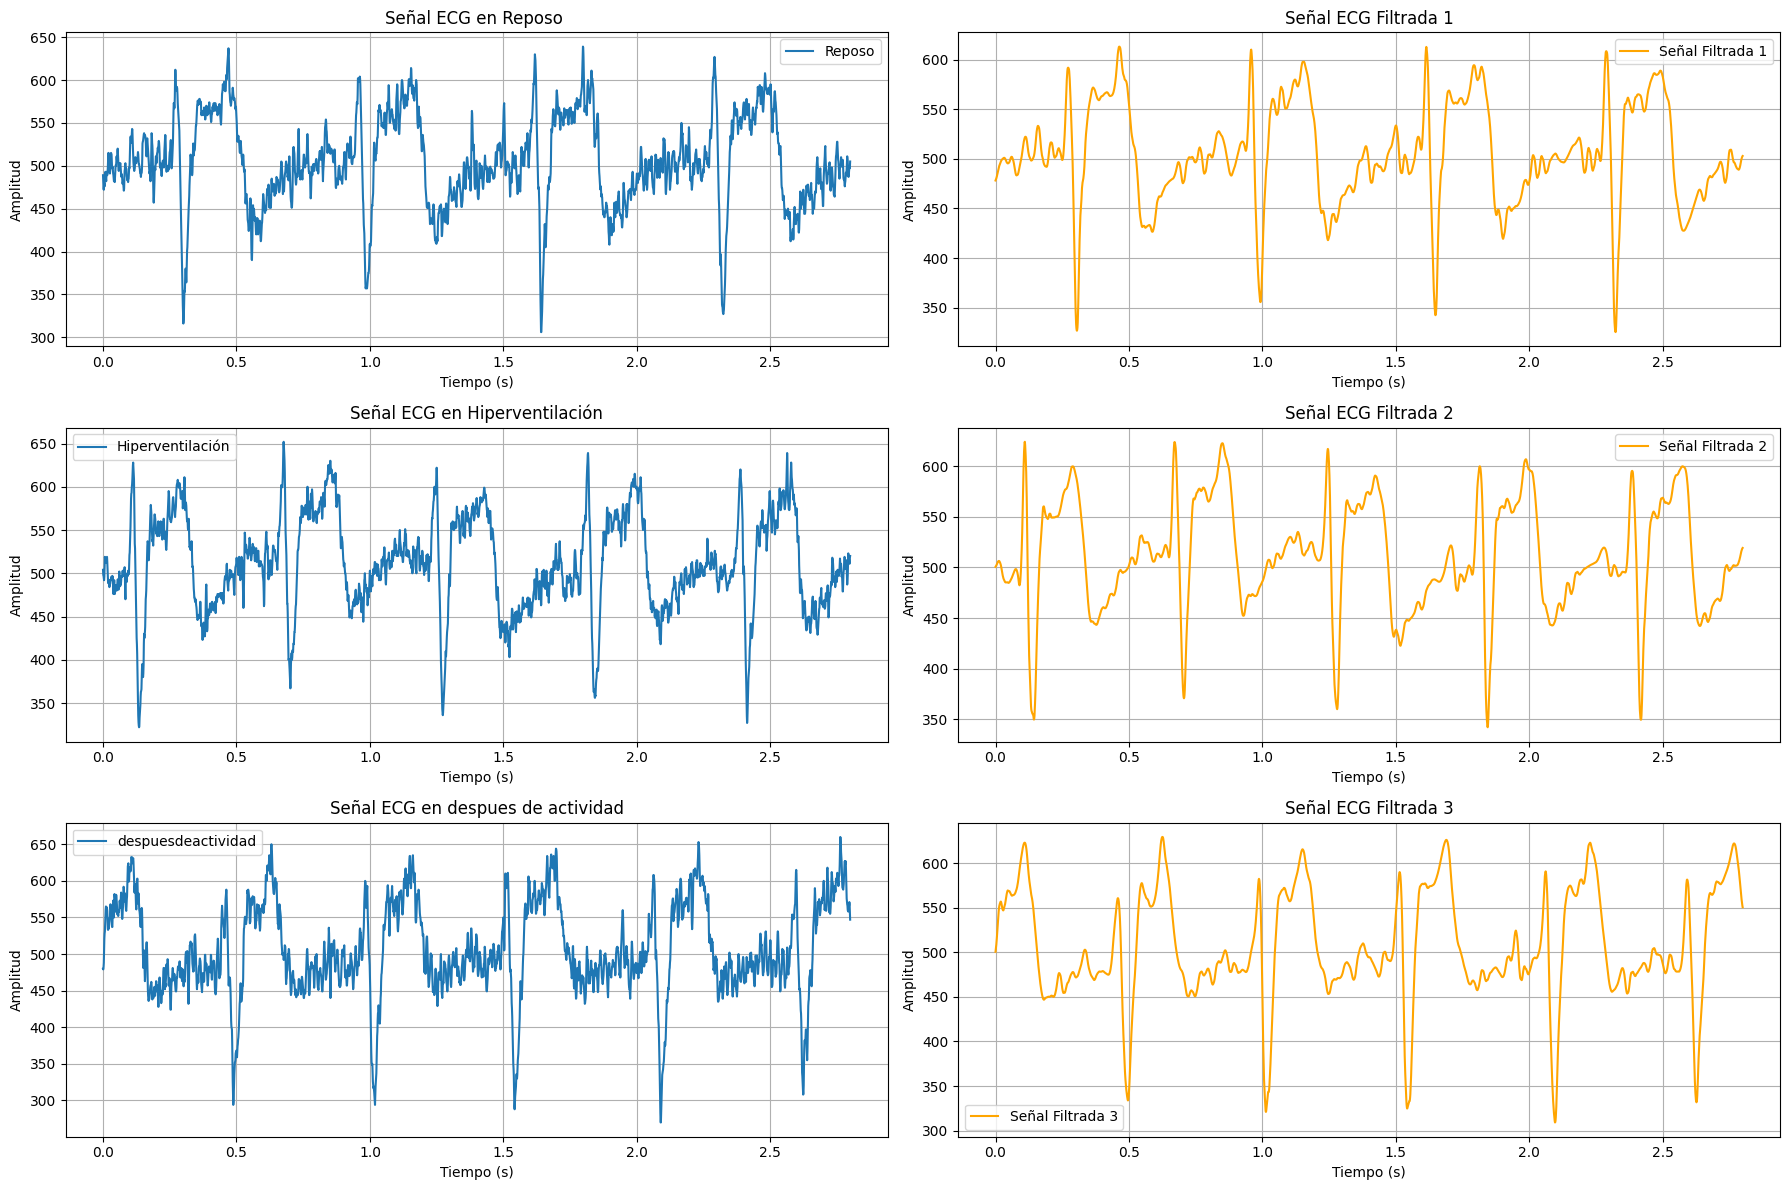

In [7]:


import math

# array1, array2, array3: señales de ECG

def wavelet_denoise(signal, wavelet, level, threshold):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    for i in range(1, len(coeffs)):
        coeffs[i] = np.where(np.abs(coeffs[i]) < threshold * np.max(coeffs[i]), 0, coeffs[i])
    return pywt.waverec(coeffs, wavelet)

# Parámetros de descomposición
wavelet = 'db5'
level = 4
threshold1 = np.sqrt(2 * np.log(len(array1)))
threshold2 = np.sqrt(2 * np.log(len(array2)))
threshold3 = np.sqrt(2 * np.log(len(array3)))
# Filtrar las tres señales
filtered_array1 = wavelet_denoise(array1, wavelet, level, threshold1)
filtered_array2 = wavelet_denoise(array2, wavelet, level, threshold2)
filtered_array3 = wavelet_denoise(array3, wavelet, level, threshold3)

# Plotear las señales originales y las señales filtradas
plt.figure(figsize=(18, 12))

# Señal original 1
plt.subplot(3, 2, 1)
plt.plot(t, array1, label='Reposo')
plt.title('Señal ECG en Reposo ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada 1
plt.subplot(3, 2, 2)
plt.plot(t[:len(filtered_array1)], filtered_array1, label='Señal Filtrada 1', color='orange')
plt.title('Señal ECG Filtrada 1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal original 2
plt.subplot(3, 2, 3)
plt.plot(t, array2, label='Hiperventilación')
plt.title('Señal ECG en Hiperventilación')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada 2
plt.subplot(3, 2, 4)
plt.plot(t[:len(filtered_array2)], filtered_array2, label='Señal Filtrada 2', color='orange')
plt.title('Señal ECG Filtrada 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal original 3
plt.subplot(3, 2, 5)
plt.plot(t, array3, label='despuesdeactividad')
plt.title('Señal ECG en despues de actividad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal filtrada 3
plt.subplot(3, 2, 6)
plt.plot(t[:len(filtered_array3)], filtered_array3, label='Señal Filtrada 3', color='orange')
plt.title('Señal ECG Filtrada 3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

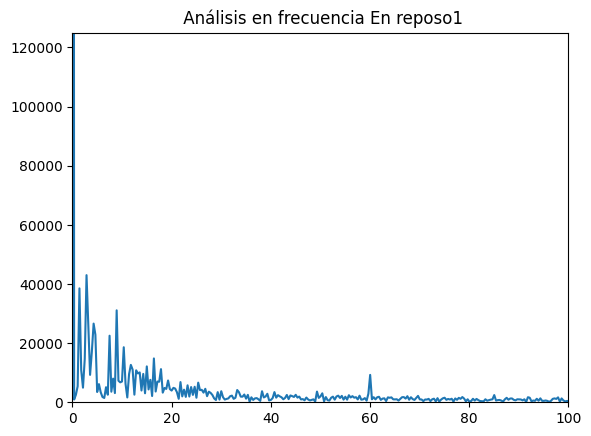

In [8]:
# Transformada de Fourier
#transformada de fourier FFT
N1 = len(array1)
N2= len(array2)
N3=len(array3)

D1 = np.fft.fft(array1,N1)
D2 = np.fft.fft(array2,N2)
D3 = np.fft.fft(array3,N3)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]

#magnitud para las cuatro señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)
D2m = np.abs(D2)
D2m = np.round(D2m,3)
D3m = np.abs(D3)
D3m = np.round(D3m,3)


#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")


Text(0.5, 1.0, ' Análisis en frecuencia de Hiperventilacion')

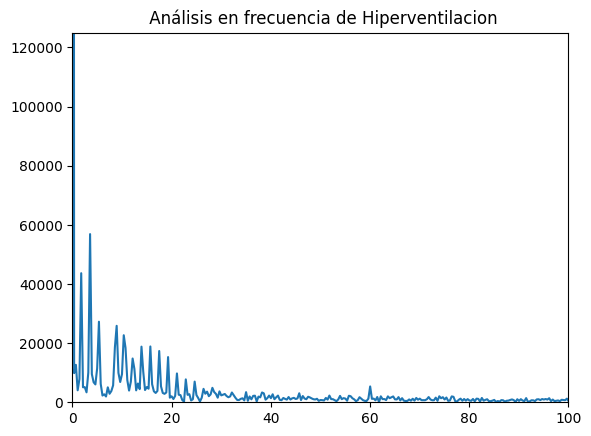

In [9]:
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de Hiperventilacion")


Text(0.5, 1.0, ' Análisis en frecuencia despues de Actividad Fisica')

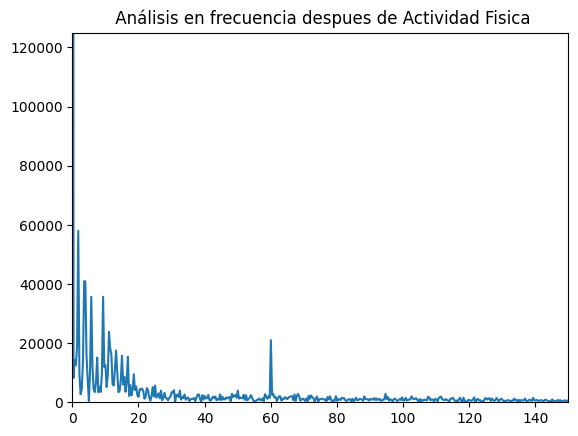

In [10]:
plt.plot(F,D3m)
plt.xlim([0,150])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia despues de Actividad Fisica")

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

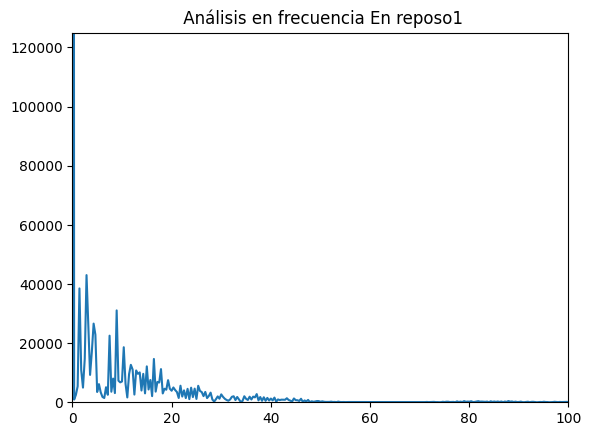

In [11]:
N1 = len(filtered_array1)
D1 = np.fft.fft(filtered_array1,N1)
D1 = D1[0:(N1//2)]
D1m = np.abs(D1)
D1m_f = np.round(D1m,3)
#frecuencias
F_f = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F_f,D1m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")


Text(0.5, 1.0, ' Análisis en frecuencia En hiperventilacion con wt')

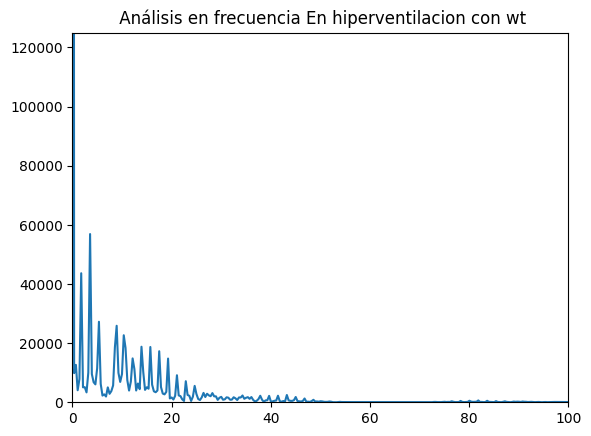

In [12]:
N1 = len(filtered_array2)
D1 = np.fft.fft(filtered_array2,N1)
D1 = D1[0:(N1//2)]
D1m = np.abs(D1)
D1m_f = np.round(D1m,3)
#frecuencias
F_f = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F_f,D1m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En hiperventilacion con wt")


Text(0.5, 1.0, ' Análisis en frecuencia despues del ejercicio con wt')

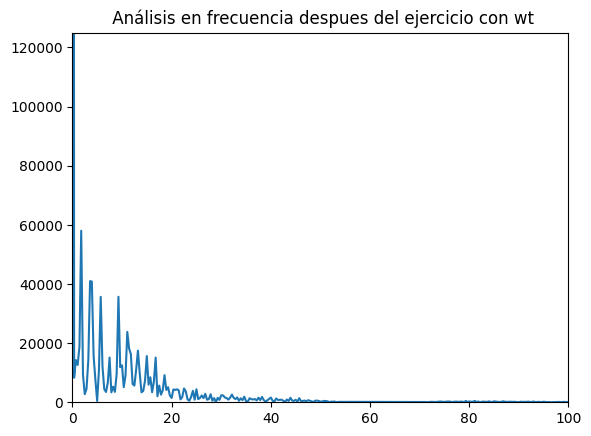

In [13]:
N1 = len(filtered_array3)
D1 = np.fft.fft(filtered_array3,N1)
D1 = D1[0:(N1//2)]
D1m = np.abs(D1)
D1m_f = np.round(D1m,3)
#frecuencias
F_f = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F_f,D1m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia despues del ejercicio con wt")

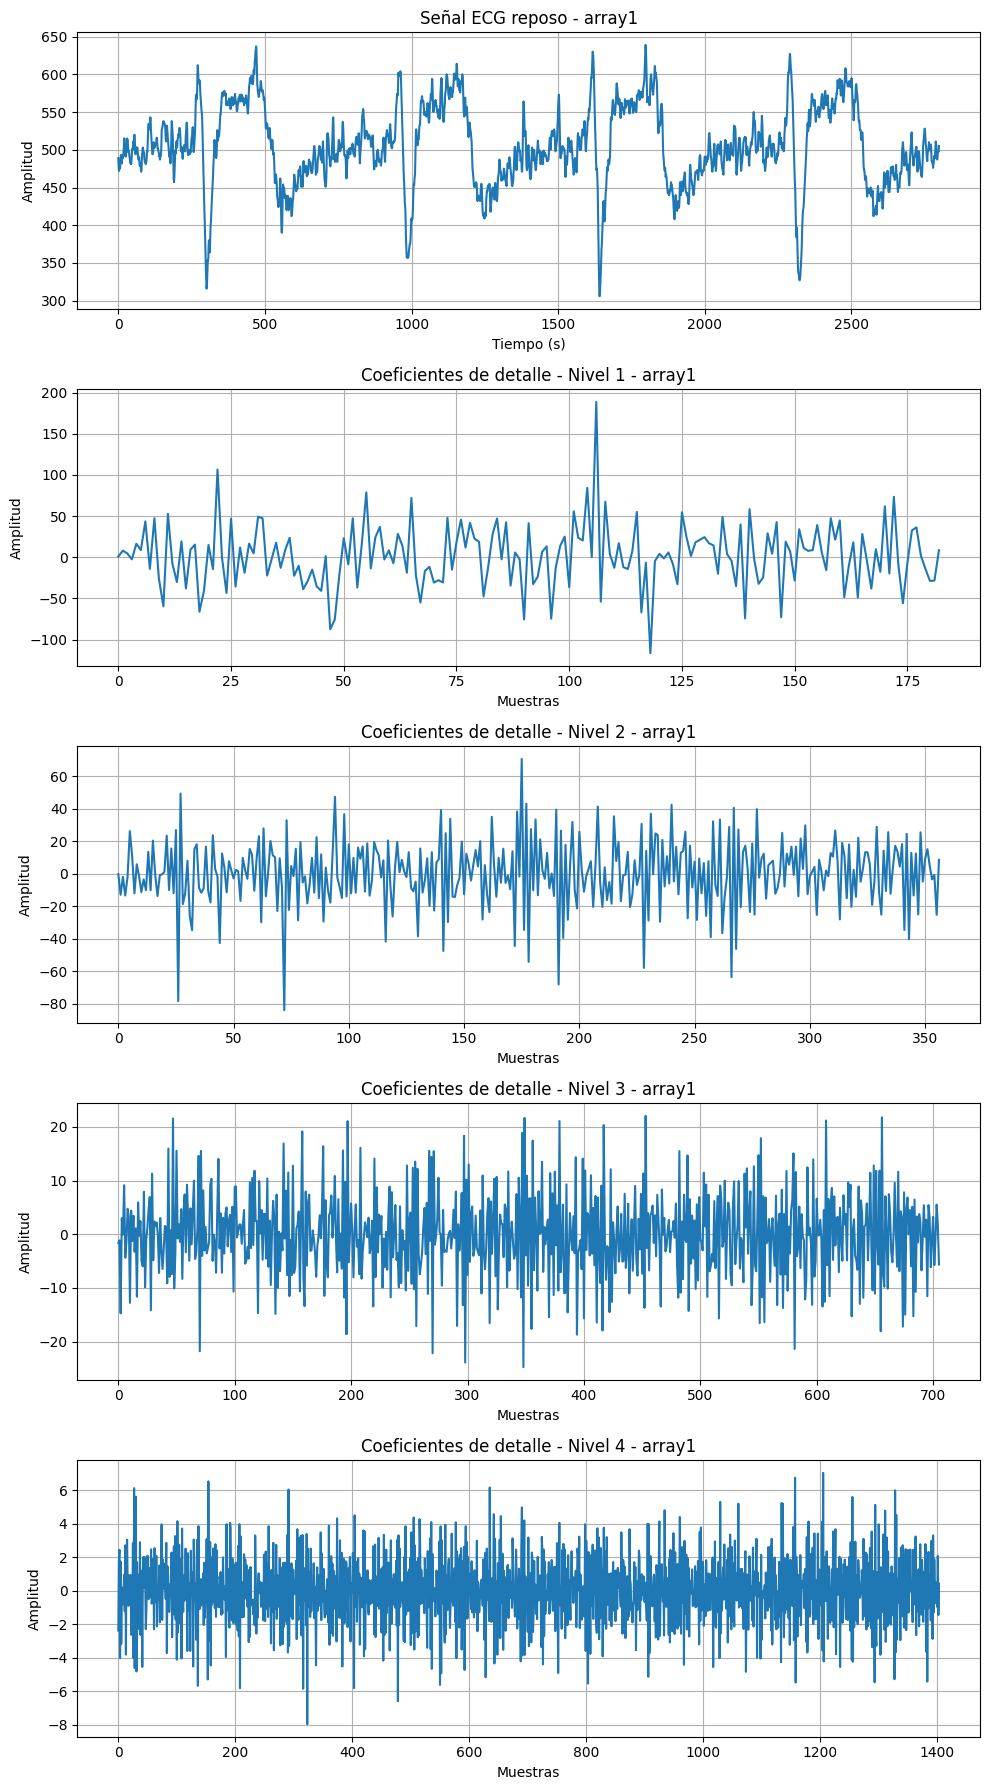

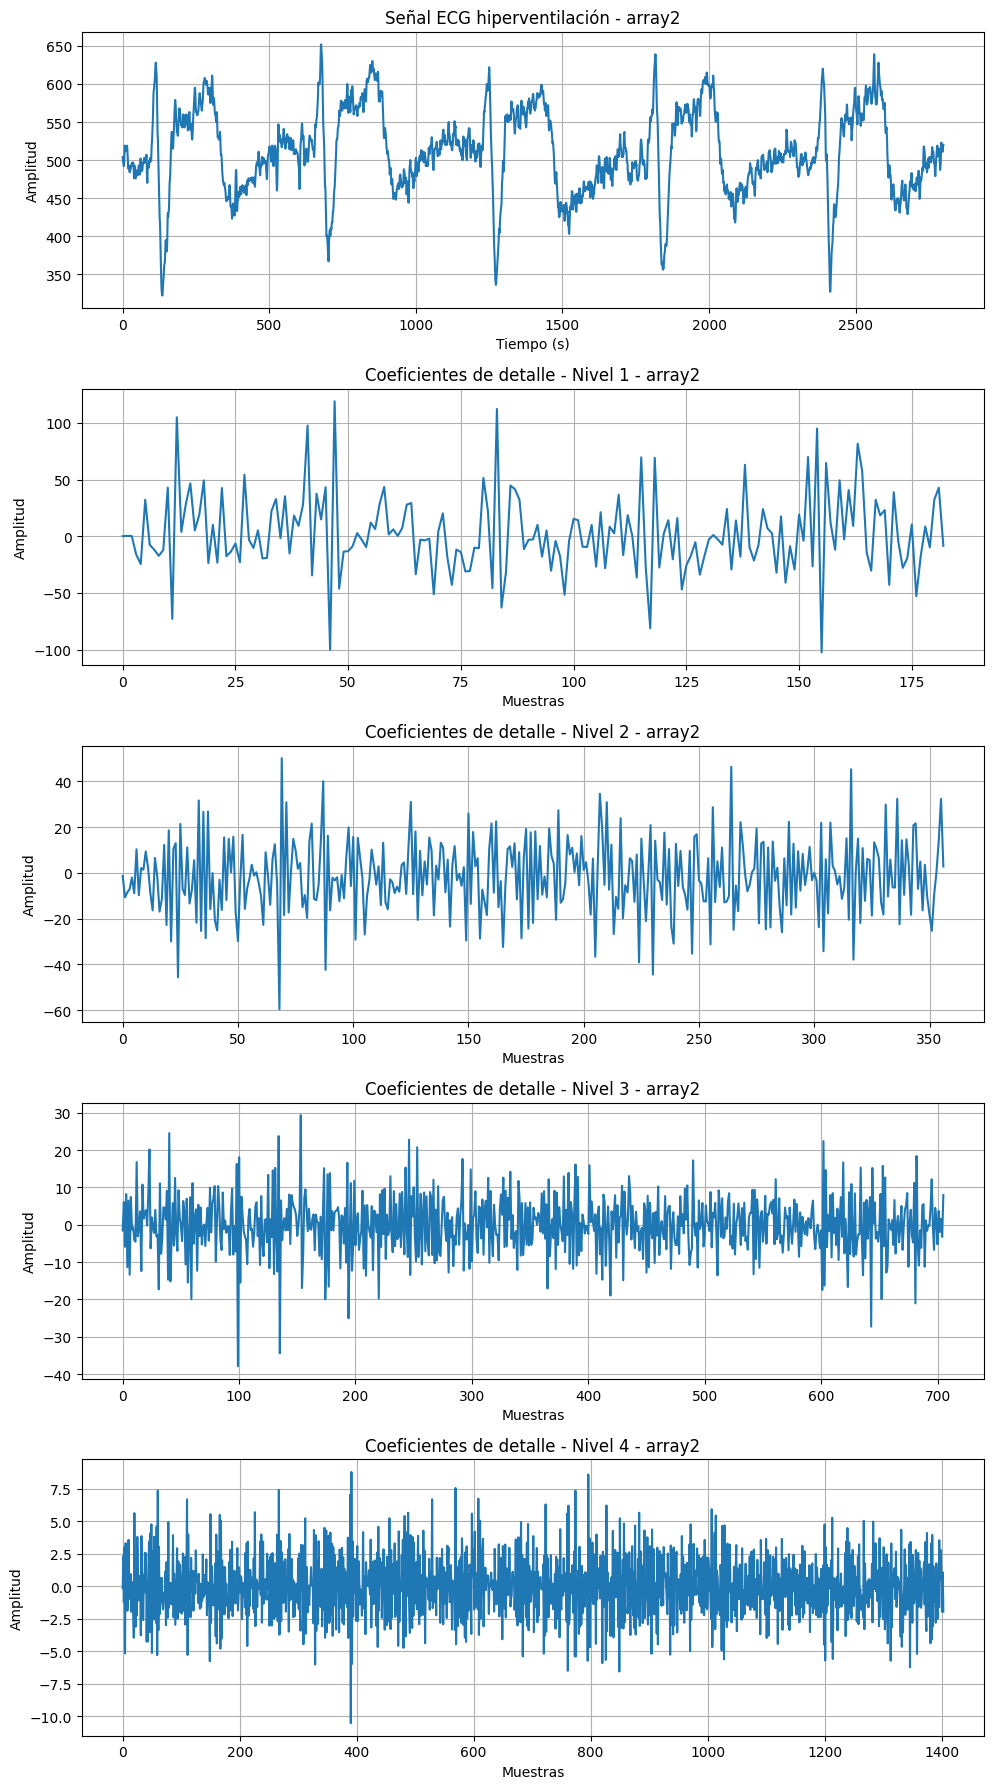

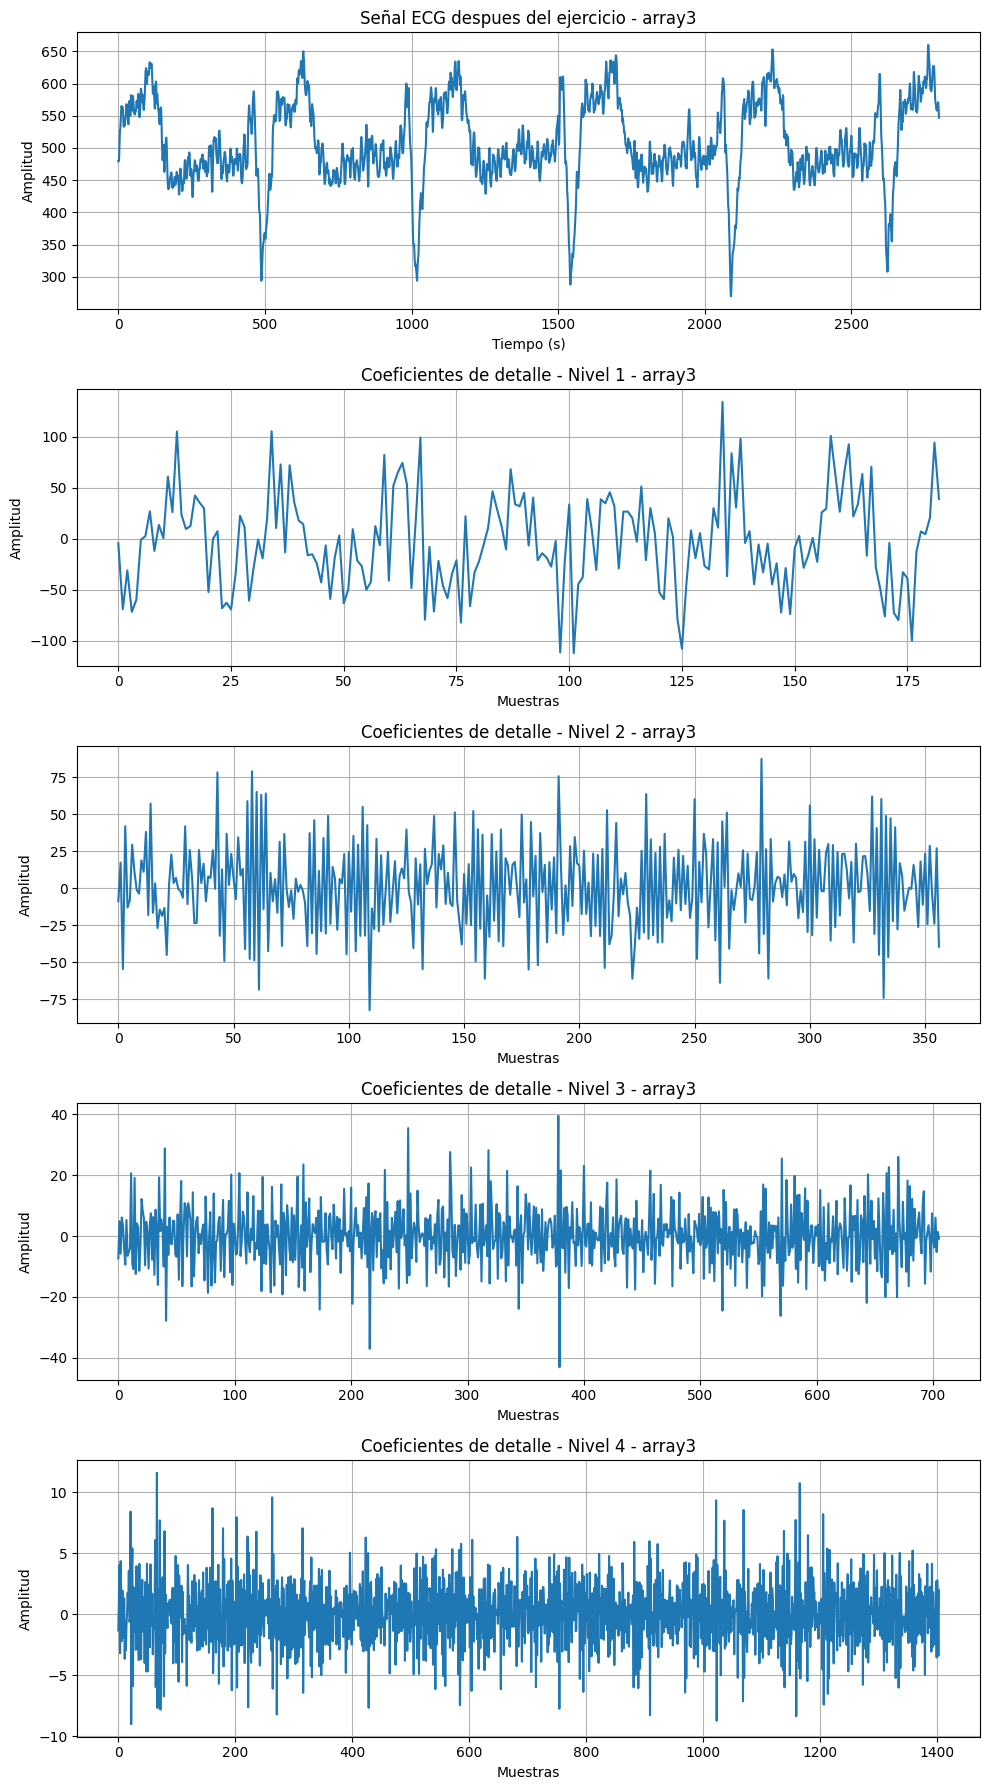

In [17]:


import numpy as np
import pywt
import matplotlib.pyplot as plt

# Supongamos que array1, array2, array3 son tus señales EMG
# array1 = ...
# array2 = ...
# array3 = ...

# Configuración de la DWT
niveles = 4
coeficientes1 = pywt.wavedec(array1, 'db5', level=niveles)
coeficientes2 = pywt.wavedec(array2, 'db5', level=niveles)
coeficientes3 = pywt.wavedec(array3, 'db5', level=niveles)

# Número de subplots requeridos para cada señal (señal original + niveles de detalle)
num_plots1 = len(coeficientes1)
num_plots2 = len(coeficientes2)
num_plots3 = len(coeficientes3)

# Crear figura para los gráficos
plt.figure(figsize=(10, 18))

# Graficar array1 y sus coeficientes
plt.subplot(num_plots1, 1, 1)
plt.plot(array1)
plt.title('Señal ECG reposo - array1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

for i, detail in enumerate(coeficientes1[1:], 1):
    plt.subplot(num_plots1, 1, i + 1)
    plt.plot(detail)
    plt.title(f'Coeficientes de detalle - Nivel {i} - array1')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

# Crear figura para los gráficos
plt.figure(figsize=(10, 18))

# Graficar array2 y sus coeficientes
plt.subplot(num_plots2, 1, 1)
plt.plot(array2)
plt.title('Señal ECG hiperventilación - array2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

for i, detail in enumerate(coeficientes2[1:], 1):
    plt.subplot(num_plots2, 1, i + 1)
    plt.plot(detail)
    plt.title(f'Coeficientes de detalle - Nivel {i} - array2')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

# Crear figura para los gráficos
plt.figure(figsize=(10, 18))

# Graficar array3 y sus coeficientes
plt.subplot(num_plots3, 1, 1)
plt.plot(array3)
plt.title('Señal ECG despues del ejercicio - array3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

for i, detail in enumerate(coeficientes3[1:], 1):
    plt.subplot(num_plots3, 1, i + 1)
    plt.plot(detail)
    plt.title(f'Coeficientes de detalle - Nivel {i} - array3')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()


